In [62]:
#Import needed libaries

import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt


In [63]:
#load the dataset

dataset = pd.read_csv('data/processed_bert.csv')
dataset.head()

y = np.asarray(dataset[['target']])
x = np.asarray(dataset)[:,:-2]

#training datasplit

#shuffle the dataset
random_index = np.random.permutation(len(x))

#Training datasplit

#split = 10%

#Randomized the index to set up the 
train_end = int(0.8*len(random_index))
val_end = int(0.9*len(random_index))
#Training Set
X_train = x[random_index[:train_end],:].astype('float32')
Y_train = y[random_index[:train_end]].astype('float32')
#Validation Set
X_val = x[random_index[train_end:val_end],:].astype('float32')
Y_val = y[random_index[train_end:val_end]].astype('float32')
#Testing Set
X_test = x[random_index[val_end:],:].astype('float32')
Y_test = y[random_index[val_end:]].astype('float32')

print(f'Length of Train: {len(X_train)}')
print(f'Length of Validation: {len(X_val)}')
print(f'Length of Test: {len(X_test)}')



Length of Train: 6090
Length of Validation: 761
Length of Test: 762


In [67]:
#Set up the NN model

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

tensorflow.random.set_seed(1)

#in and out size

insize = X_train.shape[1]
outsize = Y_train.shape[1]



layers = [1000,600,500]

firstlayer = layers[0]
secondlayer = layers[1]

Activation = 'sigmoid'

tf.random.set_seed(1)

model = Sequential()
model.add(Dense(layers[0], input_shape=(insize,),activation='sigmoid')),
model.add(Dropout(0.2))
model.add(Dense(layers[1], activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(layers[2], activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])



In [65]:
#fit the model

hist = model.fit(X_train,Y_train, validation_data=[X_val,Y_val],batch_size=32,epochs=25,verbose=2)


Epoch 1/75
191/191 - 3s - 17ms/step - accuracy: 0.5890 - loss: 0.6987 - val_accuracy: 0.6925 - val_loss: 0.6047
Epoch 2/75
191/191 - 2s - 11ms/step - accuracy: 0.6841 - loss: 0.6091 - val_accuracy: 0.7083 - val_loss: 0.5822
Epoch 3/75
191/191 - 2s - 11ms/step - accuracy: 0.7103 - loss: 0.5758 - val_accuracy: 0.7293 - val_loss: 0.5553
Epoch 4/75
191/191 - 2s - 11ms/step - accuracy: 0.7305 - loss: 0.5539 - val_accuracy: 0.7516 - val_loss: 0.5370
Epoch 5/75
191/191 - 2s - 11ms/step - accuracy: 0.7429 - loss: 0.5314 - val_accuracy: 0.7595 - val_loss: 0.5206
Epoch 6/75
191/191 - 2s - 11ms/step - accuracy: 0.7511 - loss: 0.5209 - val_accuracy: 0.7661 - val_loss: 0.5202
Epoch 7/75
191/191 - 2s - 11ms/step - accuracy: 0.7575 - loss: 0.5103 - val_accuracy: 0.7661 - val_loss: 0.5115
Epoch 8/75
191/191 - 2s - 11ms/step - accuracy: 0.7673 - loss: 0.4989 - val_accuracy: 0.7687 - val_loss: 0.5060
Epoch 9/75
191/191 - 2s - 11ms/step - accuracy: 0.7704 - loss: 0.4957 - val_accuracy: 0.7700 - val_loss:

Text(0.5, 1.0, 'Network: Dual Training')

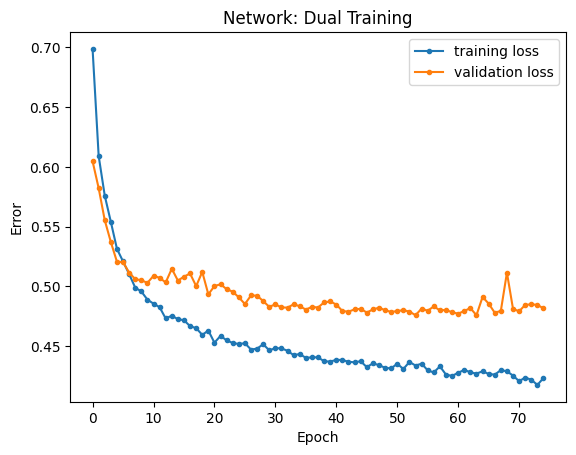

In [66]:
plt.plot(hist.history['loss'], marker='.',label='training loss')
plt.plot(hist.history['val_loss'], marker='.',label='validation loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel('Error')
plt.title('Network: Dual Training')